# Online Store Ice 

**I'm working for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. i need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.<br>
In front of us data going back to 2016. Let’s imagine that it’s December 2016 and we are planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn’t really matter whether you’re forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating such as Teen or Mature.**


# Initialization

In [1]:
# Loading all the libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import stats
import math
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
try: 
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv(r'C:\Users\Alar\Downloads\moved_games.csv')

### Explore initial data

The dataset contains the following fields:<br>
-Name<br>
-Platform<br>
-Year_of_Release<br>
-Genre<br>
-NA_sales (North American sales in USD million)<br>
-EU_sales (sales in Europe in USD million)<br>
-JP_sales (sales in Japan in USD million)<br>
-Other_sales (sales in other countries in USD million)<br>
-Critic_Score (maximum of 100)<br>
-User_Score (maximum of 10)<br>
-Rating (ESRB)<br>


## Prepare the data

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Replace the column names (make them lowercase):**

In [5]:
games.columns= games.columns.str.lower()

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### missing values

In [7]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**from our research we can see that 50% of our data is from 2007 which is old data and we have to take this to our consideration if we want to make a decisions it should be based on last years**

In [8]:
games.describe(include=['object'])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**in name column we can see 11559 unique games, we can see the most common game 'Need for Speed: Most Wanted' and we can see that PS2 is the most common platform**

**The First column: name**

In [9]:
games.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [10]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


as we can see the two missing values in name column is also the 2 missing values in genre column, i choose to drop these 2 rows 

In [11]:
games = games.dropna(subset=['name'])

In [12]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**year_of_release :**

year_of_release dealing with missing value : as we can see the most safer way to fill in the gaps according to the name column 

In [13]:
games['year_of_release']= games.groupby(['name'])['year_of_release'].transform(
    lambda grp: grp.fillna(np.median(grp))
)
for row in games:
    try:
        games['year_of_release']=games['year_of_release'].astype(Int64)
    except:
        games['year_of_release']=games.groupby(['name'])['year_of_release'].fillna(method='ffill')


In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16524 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


i couldn't replace all the values by the name and platform so i choose to replace the rest with 0, 
as appropriate solution is to fill in the gaps with some strange value that i can easily drop if needed. 


In [15]:
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

In [16]:
games.duplicated().sum()

0

In [17]:
games[games[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,2006,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [18]:
games = games.drop_duplicates(['name', 'platform'])

In [19]:
games[games[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**lets explore the critic_score, user_score, rating columns:**

In [20]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [21]:
games.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


in the head we can see the 'top title' and in the tail we can see games with no sales and no score or rating this can give us an idea that games who have sales the gamers tend to give a rating but for games who are old we can see nan values and that may happend because they didt update the rating for games, or that was something that wasn't a common thing and because of that we have nan values in these columns 

**Convert the data to the required types**

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16709 non-null  int32  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   float64
 9   user_score       10010 non-null  object 
 10  rating           9945 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


In [23]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

as we can see in column user_score there is 'TBD' (to be determined). i will consider this rows with tbd value as a NaN values because it kind of missing values -tbd doesnt say anything to us, for that i choose to replace it with 

In [24]:
games['user_score'] = games['user_score'].replace(['tbd'], np.nan)

In [25]:
games['user_score'] = games['user_score'].astype(float)

In [26]:
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**i will try to deal with missing value in the column critic score, user score and rating by filling themissing values based in columns name**

In [27]:
games.isna().mean()*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.325633
user_score         54.599318
rating             40.481178
dtype: float64

ignoring missing values for critic_score, user_score and rating.I think that different games can have disparate ratings on several platforms. One can really have a different perception playing some game on different platforms, since platforms have their own characteristics. It's hard to figure out a decent replacement for these Nan-s.

**Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.**

In [28]:
games['total_sales']= games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [29]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Conclusions**

In the last steps, we changed the data type to columns where needed. we fill in the gaps in the columns that have missing values. But as we can see the data still have missing values; for example, critic_score, user_score, and rating, there are a lot of NaNs.
We will try to understand why we have those missing values in our data. and we will move on to study our data

Now I am going to analyze the data in order to be able to test our hypothesis

## Analyze the data

### Look at how many games were released in different years. Is the data for every period significant?

In [30]:
games['year_of_release'].value_counts()

2008    1440
2009    1429
2010    1265
2007    1201
2011    1148
2006    1013
2005     943
2002     837
2003     780
2004     764
2012     653
2015     606
2014     582
2013     547
2016     502
2001     485
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
0        189
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [31]:
games1=games[games['year_of_release']!=0]

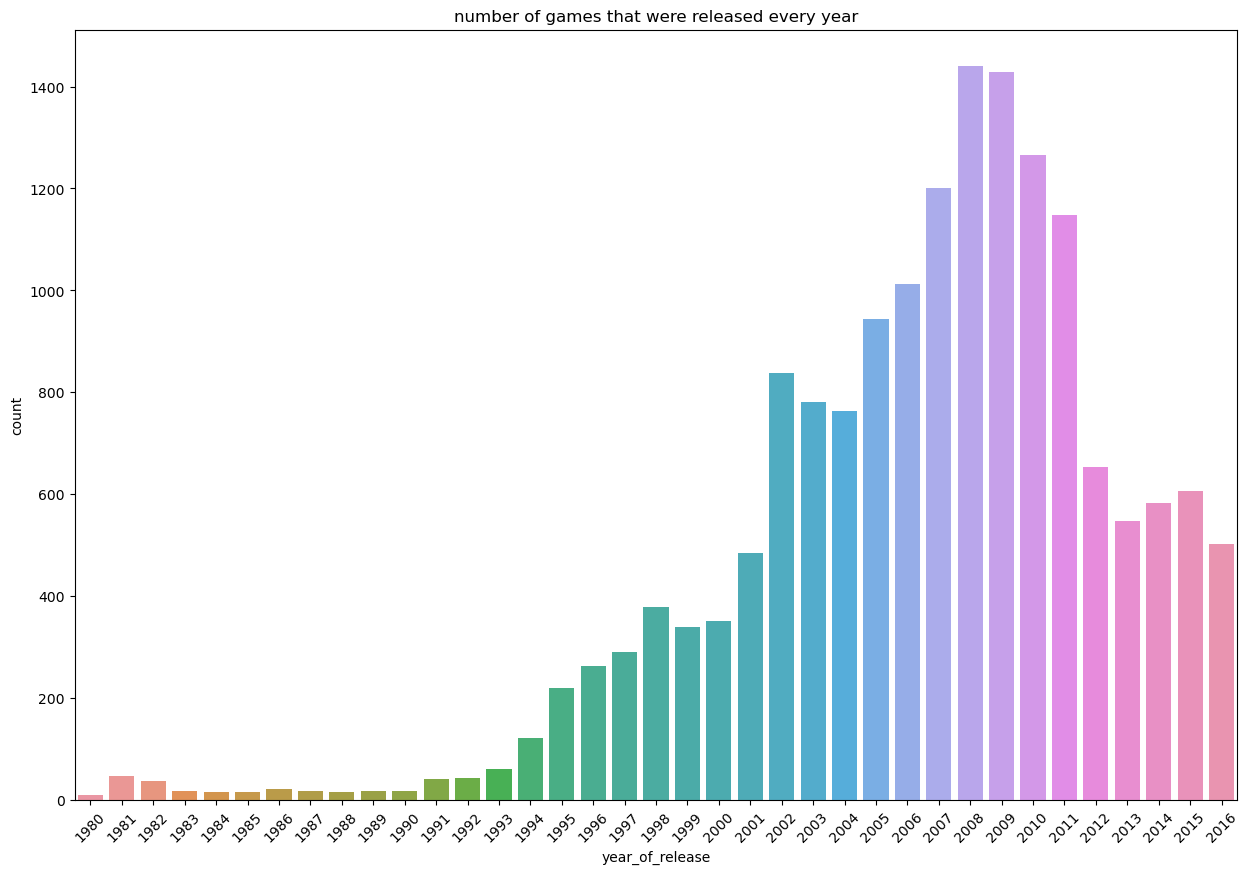

In [32]:
plt.figure(figsize=(15, 10))
plt.title('number of games that were released every year')
sns.countplot(x="year_of_release", data=games1, order = games1.groupby(by=['year_of_release'])['name'].count().index)
plt.xticks(rotation=45)
plt.show()

From our research, the year with the most significant number of released games is 2008, 1440 were released.
in 2009, 1429 games were released. also, we can see a peek at the number of games from 2000 it maybe the beginning of the industry 

### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?.

In [33]:
platform_sales = games.groupby(['platform'])['total_sales'].sum().reset_index()

In [34]:
platform_sales.sort_values(by=['total_sales'], ascending=False)

,platform,total_sales
16,PS2,1255.77
28,X360,970.17
17,PS3,939.16
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.44


In [35]:
platform_sales['sales_zscore'] = (platform_sales['total_sales']-platform_sales['total_sales'].mean())/platform_sales['total_sales'].std()

In [36]:
platform_sales=platform_sales.sort_values(by='sales_zscore' ,ascending=False)
platform_sales.head()

,platform,total_sales,sales_zscore
16,PS2,1255.77,2.781618
28,X360,970.17,1.961183
17,PS3,939.16,1.872101
26,Wii,907.51,1.781181
4,DS,806.12,1.489921


we want to know how every platform is different from other platforms, for that I calculate the Z-Score which takes every platform and calculates how far this platform is from the average revenue for all the platform <br>
we can see positive and negative values, the positive values shows us successful platforms and the negative values are below the average showing us the unsuccessful platforms

In [37]:
platform_sales['color']=['red' if x<0 else 'green' for x in platform_sales['sales_zscore']]
platform_sales

,platform,total_sales,sales_zscore,color
16,PS2,1255.77,2.781618,green
28,X360,970.17,1.961183,green
17,PS3,939.16,1.872101,green
26,Wii,907.51,1.781181,green
4,DS,806.12,1.489921,green
15,PS,730.86,1.273724,green
6,GBA,317.85,0.087281,green
18,PS4,314.14,0.076623,green
19,PSP,294.05,0.018911,green
13,PC,259.44,-0.080512,red


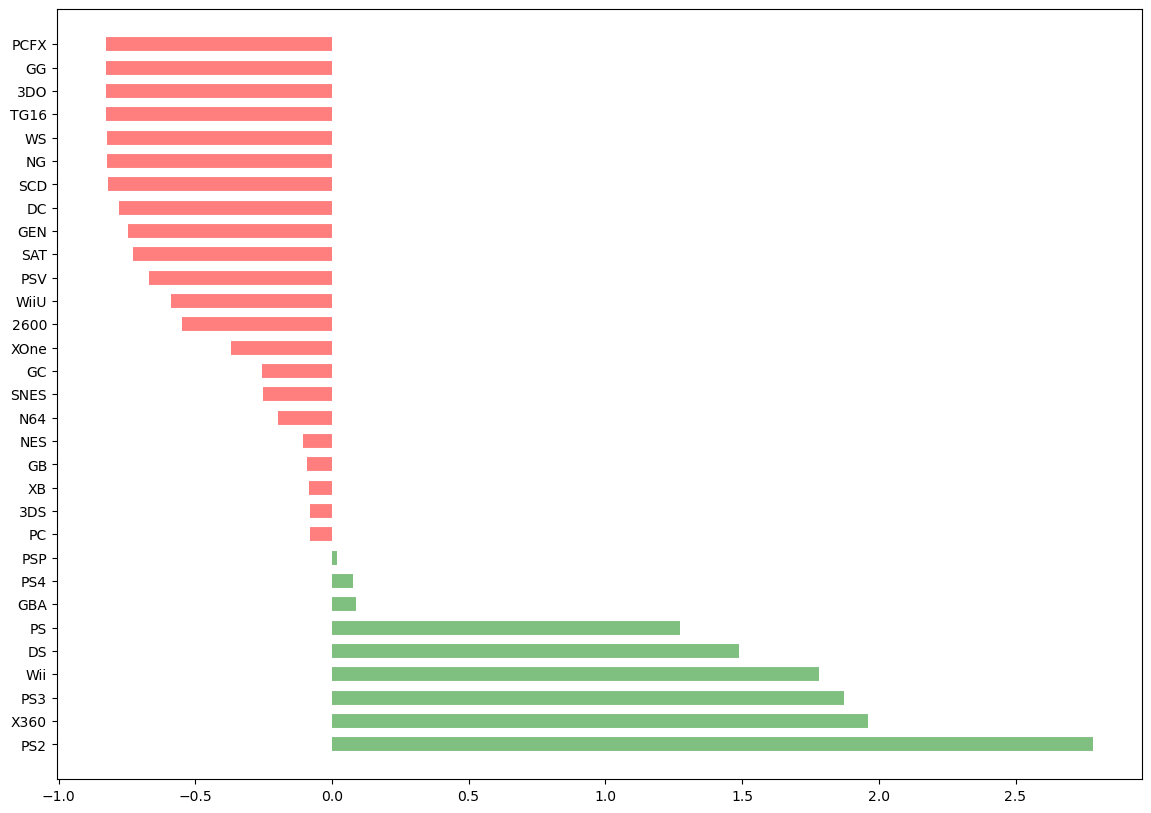

In [38]:
plt.figure(figsize=(14,10))
plt.hlines(y=platform_sales.platform,xmax=platform_sales.sales_zscore, xmin=0,color=platform_sales.color, alpha=0.5, linewidth=10)
plt.show()

the chart gives us a perspective on the revenue of platforms, there is the platforms that they are leaders who's standard division closed to 3, and because of those outliers we have alot of platforms that the z score bellow zero, and that because the average is high that was influence by the outliers, that means even if there is a platform is successful it will be considers under the average because of the outliers

**Choose the platforms with the greatest total sales and build a distribution based on data for each year**

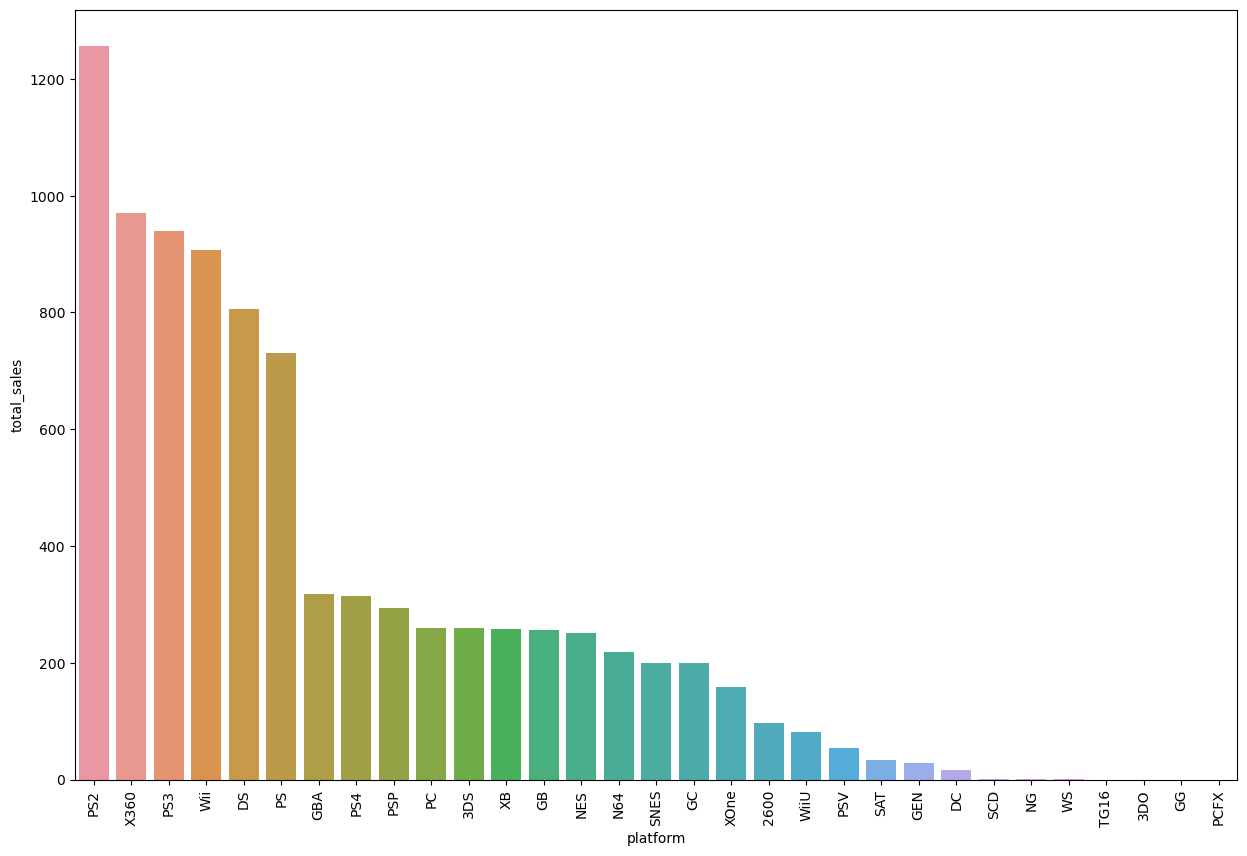

In [39]:
plt.figure(figsize=(15, 10))
sns.barplot(x='platform', y='total_sales', data=platform_sales, order=platform_sales.sort_values('total_sales',ascending=False).platform)
plt.xticks(rotation=90)
plt.show()

from the plot we can see the most popular platforms is PS2, X360, PS3, Wii, DS 

**i choose to take the last 20 years to do my analysis to have a clear picture**

In [40]:
relevant_year =games[games.year_of_release>=2000]

In [41]:
ps_two=relevant_year[relevant_year['platform'] == 'PS2']


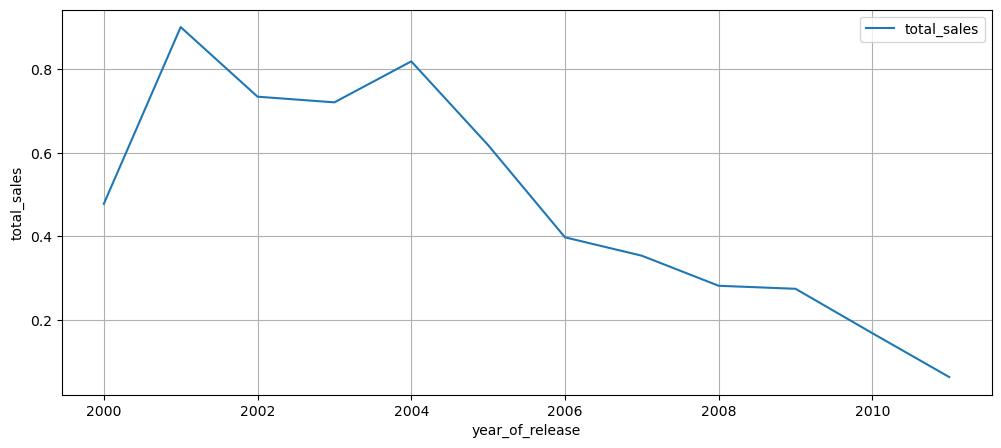

In [42]:
(ps_two
      .pivot_table(index='year_of_release',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('year_of_release')
plt.ylabel('total_sales')
plt.show()

we can see for PS2 platform the total sales over the years from 2000 to 2011 are shrinking 

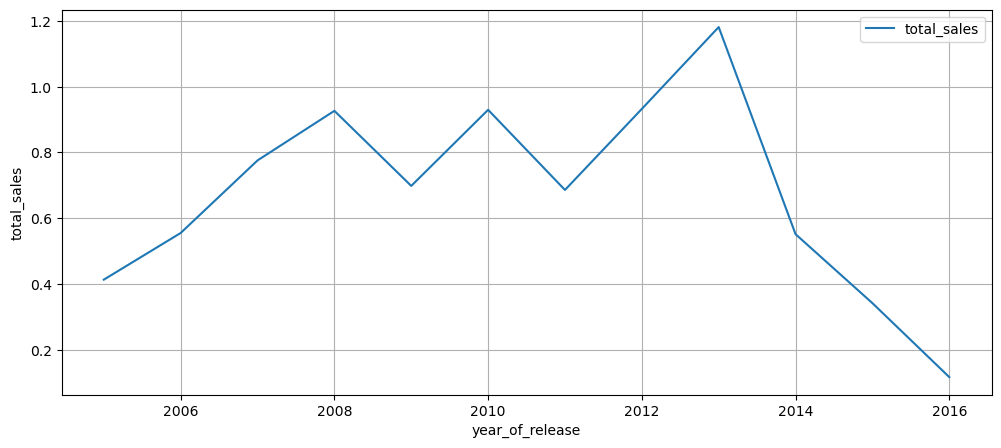

In [43]:
X360=relevant_year[relevant_year['platform'] == 'X360']

(X360
      .pivot_table(index='year_of_release',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('year_of_release')
plt.ylabel('total_sales')
plt.show()


Also here for x360 over the years from 2006 to 2015, the total sales were growing, but after that the total sales dropped.

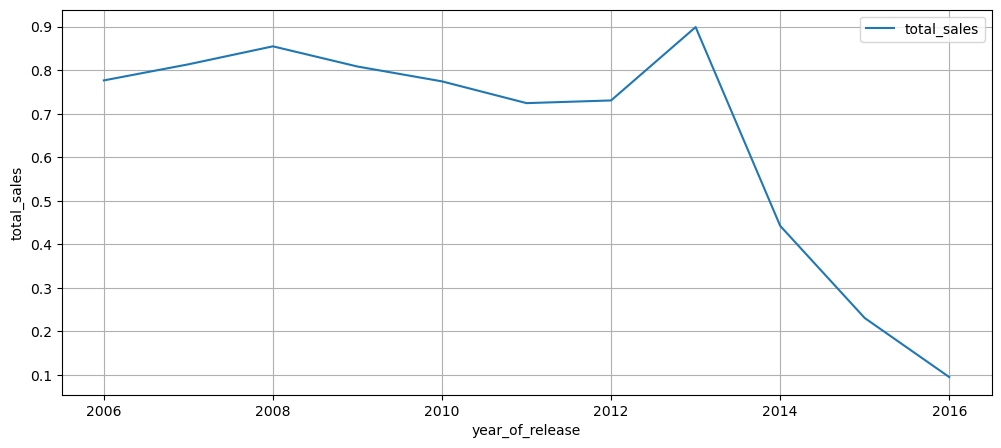

In [44]:
PS3=relevant_year[relevant_year['platform'] == 'PS3']

(PS3
      .pivot_table(index='year_of_release',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('year_of_release')
plt.ylabel('total_sales')
plt.show()


ps3 maintained total sales throughout the years from 2006 until 2013 and then the total sales dropped

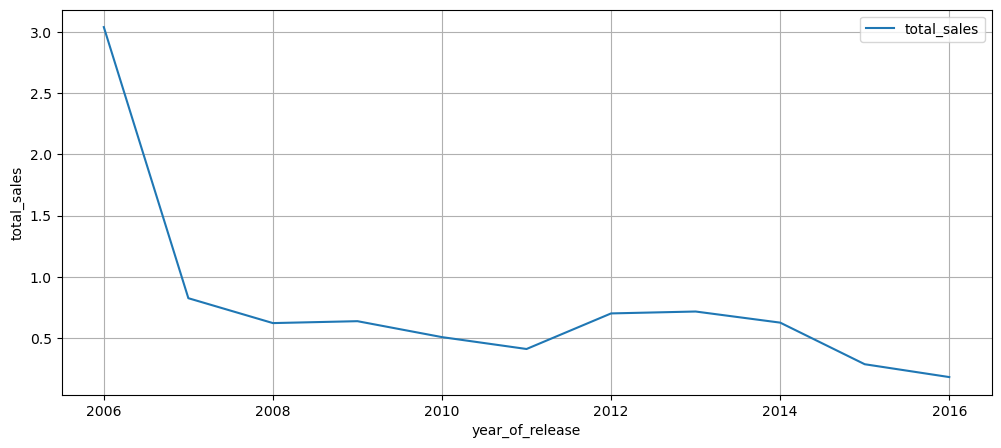

In [45]:
Wii=relevant_year[relevant_year['platform'] == 'Wii']

(Wii
      .pivot_table(index='year_of_release',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('year_of_release')
plt.ylabel('total_sales')
plt.show()


Wii platform in 2006 had a respectable total sales, but after that the ttal sales have been declining throughout the years from 2007 untill 2016

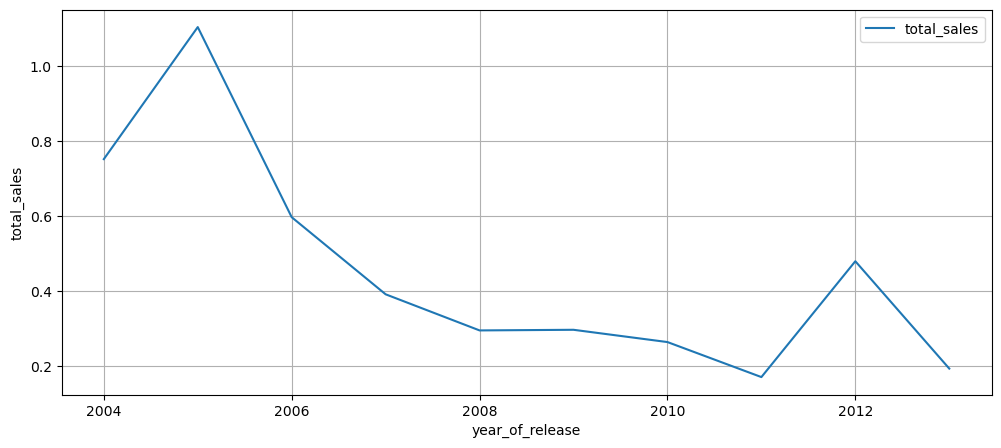

In [46]:
DS=relevant_year[relevant_year['platform'] == 'DS']

(DS
      .pivot_table(index='year_of_release',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('year_of_release')
plt.ylabel('total_sales')
plt.show()


DS was active platform from 2004 -2013 we can see two peek in total sales, the first one it was in 2005 and after that the total sales dropped till 2012 the doubled the total sales to 0.5m and then dropped again

**Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?**

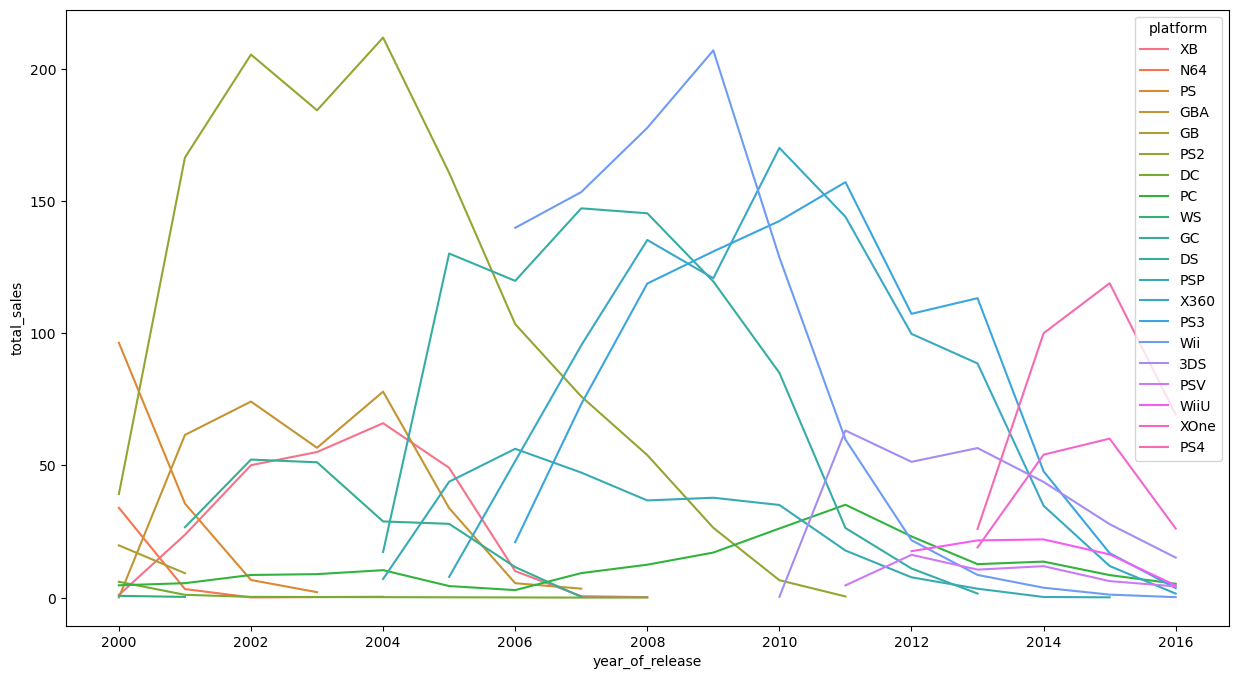

In [47]:
relevant_year=relevant_year.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=relevant_year, x ='year_of_release', y='total_sales', hue='platform')

In [48]:
platform_age=relevant_year.groupby(['platform'])['year_of_release'].agg(['min','max'])
platform_age.head()

,min,max
platform,,
3DS,2010,2016
DC,2000,2008
DS,2004,2013
GB,2000,2001
GBA,2000,2007


In [49]:
platform_age['age']=platform_age['max']-platform_age['min']

In [50]:
platform_age['age'].median()

6.5

In [51]:
platform_age=platform_age.reset_index()
platform_age.sort_values(by='min')

,platform,min,max,age
9,PS2,2000,2011,11
1,DC,2000,2008,8
3,GB,2000,2001,1
4,GBA,2000,2007,7
6,N64,2000,2004,4
7,PC,2000,2016,16
8,PS,2000,2003,3
18,XB,2000,2008,8
14,WS,2000,2001,1
5,GC,2001,2007,6


the reasearch shows us that there is to many platforms has been faded away, the only platforms that are relevan for our researsh, we should take only the platforms that starting to show in the last 4 years

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The key criterion is that the data should allow you to build a prognosis for 2017.

In [52]:
games_new=games[games.year_of_release>=2012]
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

i want to calculate the different from the years 

In [53]:
games2=pd.pivot_table(games_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
games2.tail()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.15,107.35,0.00,7.69,16.19,21.71,17.56,99.75,0.00
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [54]:
games2.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,51.36,11.01,23.15,107.35,0.00,7.69,16.19,21.71,17.56,99.75,0.00
2014,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2015,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [55]:
games2- games2.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,5.21,-9.47,-10.49,5.90,25.99,-4.31,-5.60,-13.12,4.09,-11.17,18.96
2014,-12.81,-1.54,0.97,-65.49,74.01,-3.14,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-5.11,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [56]:
dynamics=(games2- games2.shift(+1)).T
dynamics

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,NaN,5.21,-12.81,-15.98,-12.64
DS,NaN,-9.47,-1.54,0.00,0.00
PC,NaN,-10.49,0.97,-5.11,-3.27
PS3,NaN,5.90,-65.49,-30.94,-13.22
PS4,NaN,25.99,74.01,18.90,-49.65
PSP,NaN,-4.31,-3.14,-0.12,-0.12
PSV,NaN,-5.60,1.31,-5.65,-2.00
Wii,NaN,-13.12,-4.84,-2.61,-0.96
WiiU,NaN,4.09,0.38,-5.68,-11.75


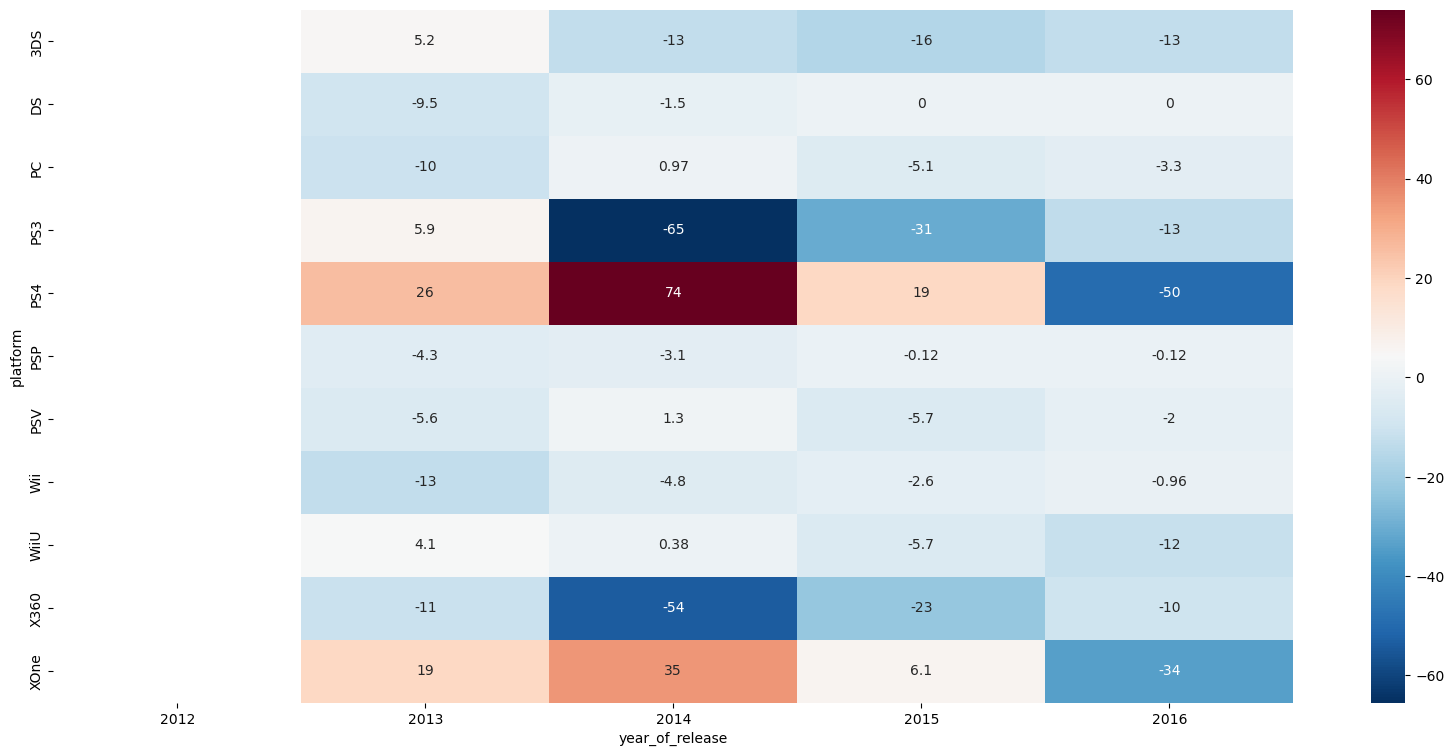

In [57]:
plt.figure(figsize=(20,9))
sns.heatmap(dynamics, cmap='RdBu_r', annot=True)
plt.show()

**according to the heatmap, we can see for every platform in the colorful cells there was a change in there reveneue, the values doesn't have to be positive in the last year because we dont have the complete data for 2016 so negative values in 2016 doesnt mean the platform is not profitable<br>
we can consider the platforms PS4 and XOne as a profitable platforms for the next year  because they have for two last year a positive values in there revenue**

### Build a box plot for the global sales of each game, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [58]:
grouped_games=games_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped_games

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2885,XOne,XCOM 2,0.04
2886,XOne,ZombiU,0.01
2887,XOne,Zombie Army Trilogy,0.11
2888,XOne,Zoo Tycoon (2013),0.36


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

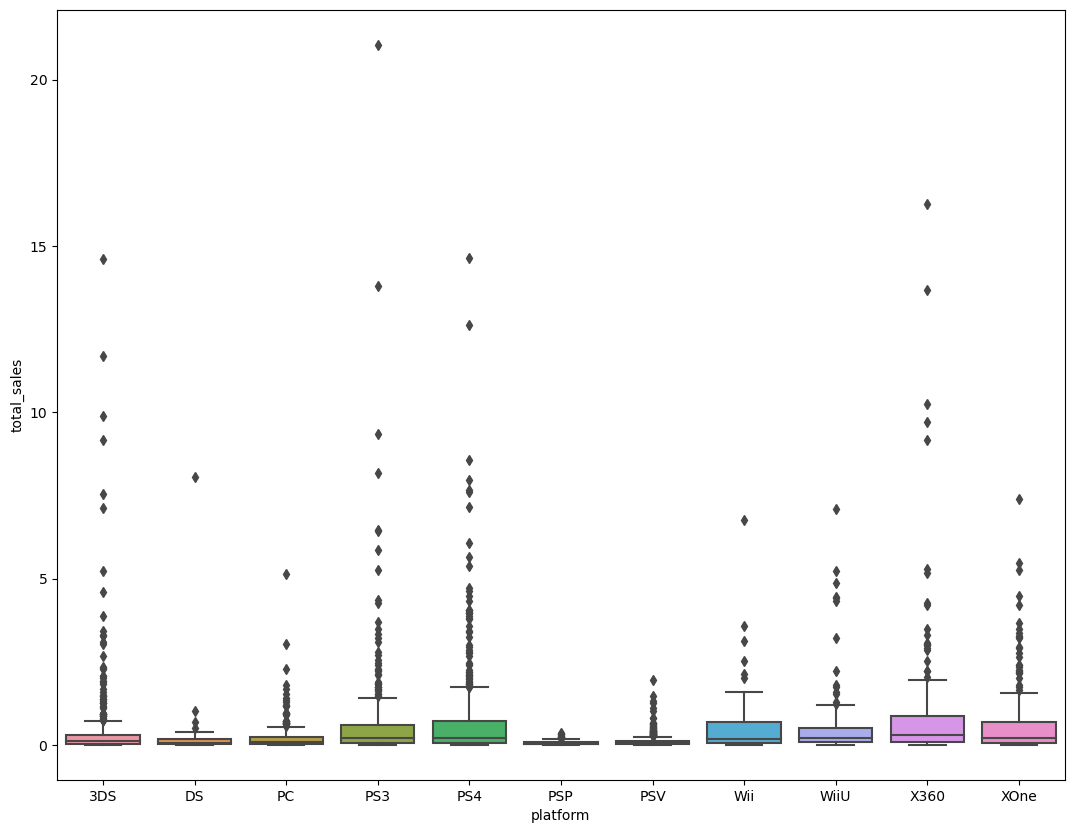

In [59]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped_games)

**the 3DS. Small box and lots of outliers. This suggests that a large part of the sales volume comes from these outliers. At the same time, the XOne has a different situation: a large box, a long whisker and few outliers. This indicates that a wide variety of games are bought on XOne, and, moreover, in considerable quantities.**

compare the revenue for platform without outliers :

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

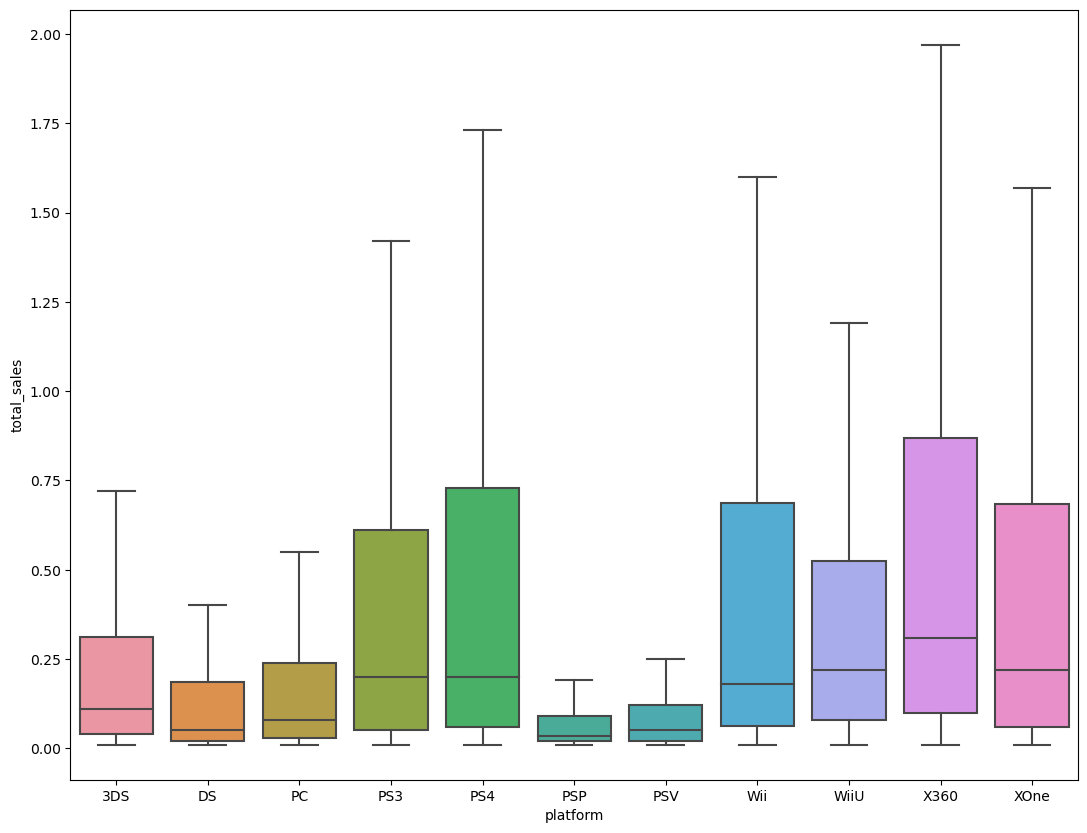

In [60]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped_games,showfliers = False)

In [61]:
order_grouped_games=grouped_games.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order_grouped_games

5      PSP
1       DS
7      Wii
6      PSV
2       PC
8     WiiU
10    XOne
0      3DS
9     X360
3      PS3
4      PS4
Name: platform, dtype: object

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

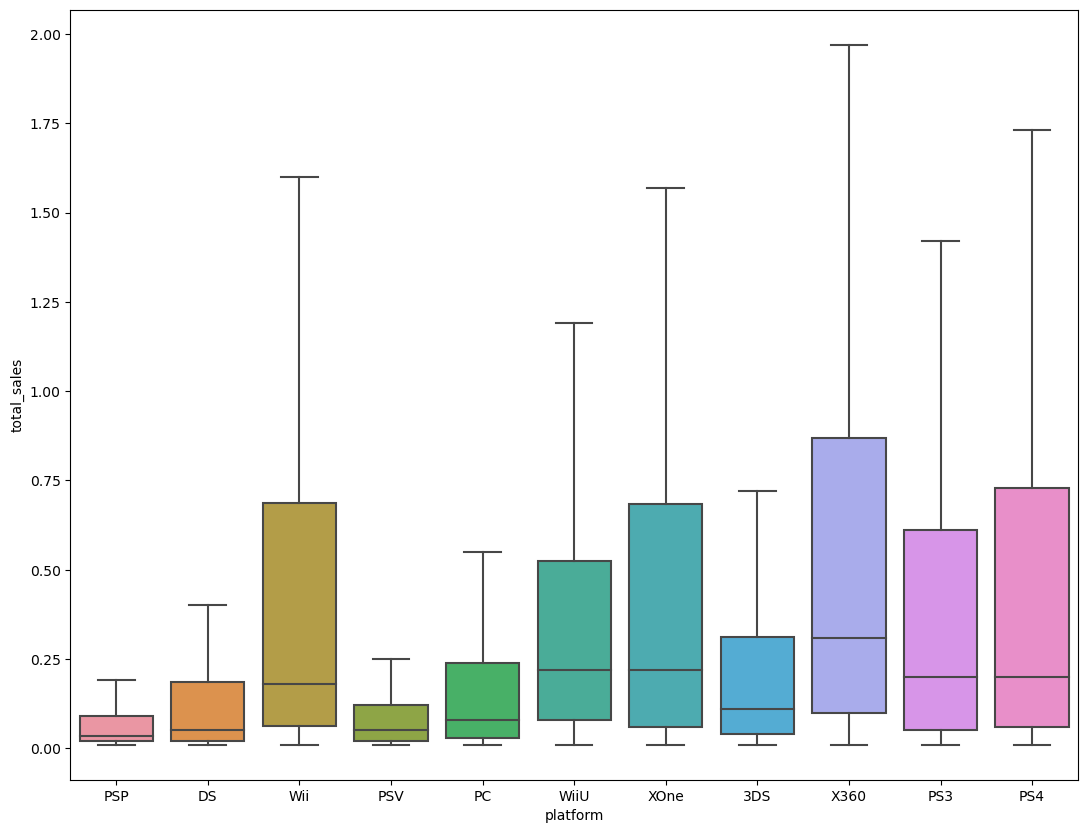

In [62]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped_games, order=order_grouped_games ,showfliers = False)

We can see revenue distribution for every platform; every value in the boxplot is for one game on this platform. This helps us to understand what is the average revenue for the games for every platform, which helps us to decide which platform games we should sell in our store.<br>
We can see PS4 and PS3, the average revenue for games on these platforms is about 0.2m, and x360 the average revenue for games on this platform is 0.3m. new platforms will have, on average more expensive games. But for old platforms like ps3 it's kind of old, but has a great revenue because it has more games that were generated, but the overall revenue per game was not that high.

#### Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
 


i choose PS4 with the relevant years **************

In [63]:
PS4=games_new[games_new['platform'] == 'PS4']
PS4=PS4[['name','year_of_release','critic_score','user_score','total_sales']].sort_values('critic_score',ascending=False)

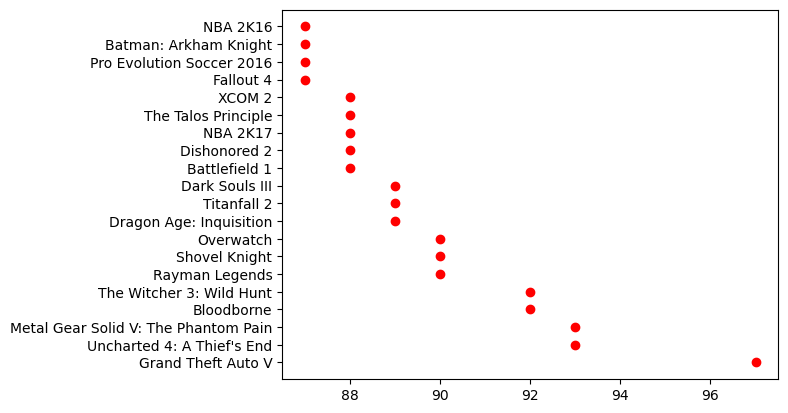

In [64]:
plt.scatter(PS4['critic_score'].iloc[:20],PS4['name'].iloc[:20],color='r')


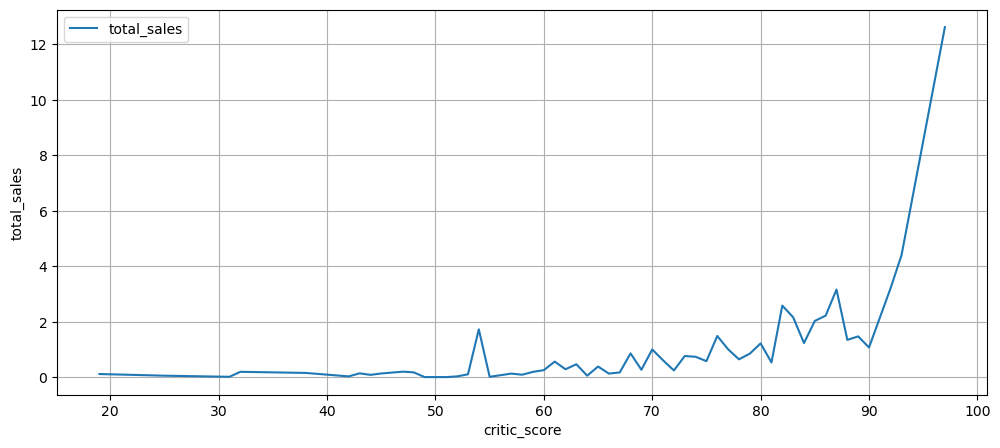

In [65]:
(PS4
      .pivot_table(index='critic_score',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.show()


In [66]:
print(PS4['critic_score'].corr(PS4['total_sales']))


0.4065679020617811


conclusion : we can see that there is a weak correlation between total sales and critic score games that has a high critic sales can help to get high revenue for the platforms 

Platform:  PS4


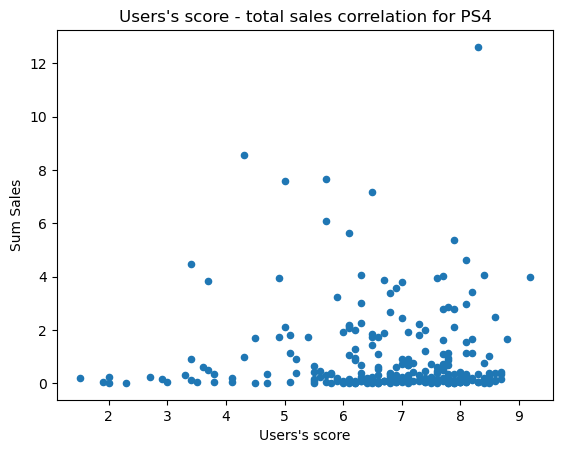

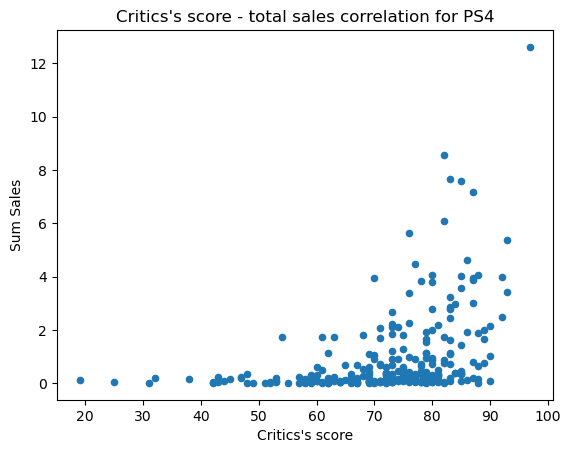

Platform:  XOne


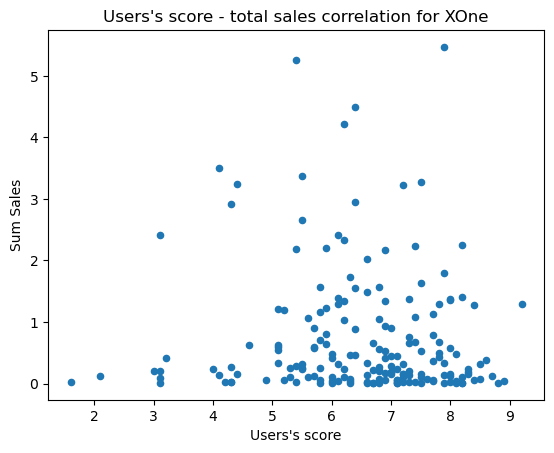

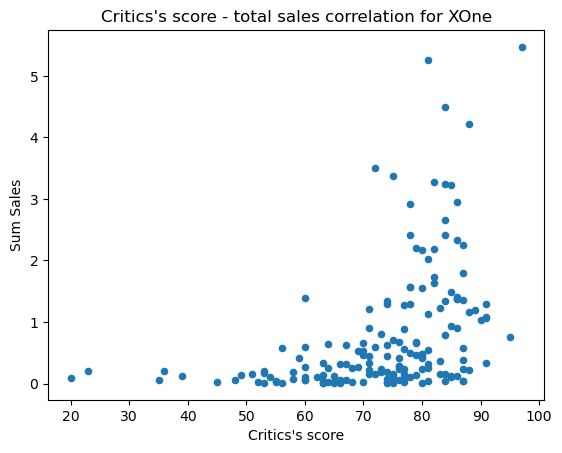

Platform:  3DS


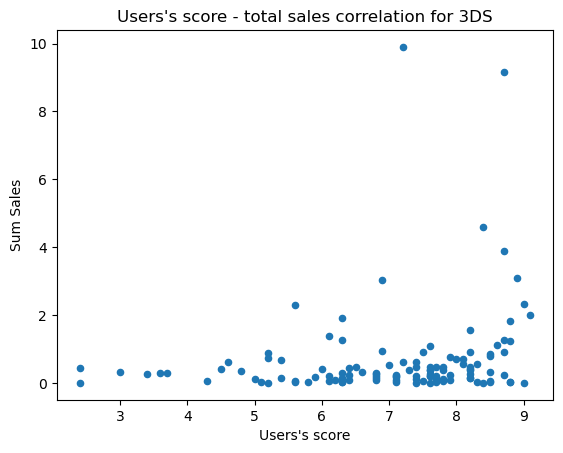

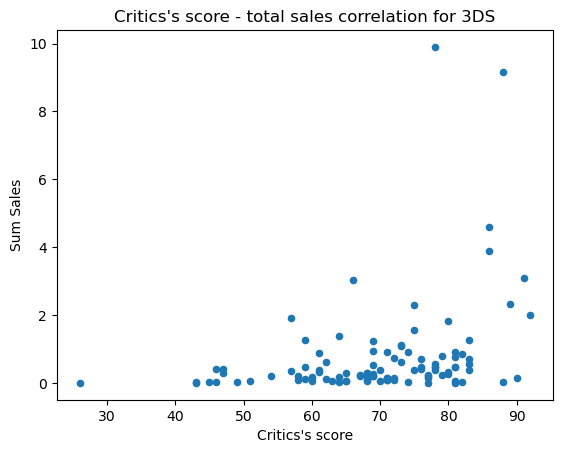

In [67]:
for i in ['PS4', 'XOne', '3DS']:
    print('Platform: ', i)
    
    data = games_new[games_new['platform'] == i]  # take only current platform.
    
    data.plot.scatter(x='user_score', y='total_sales')
    
    # Title is a string, that's why I use formating.
    plt.title("Users's score - total sales correlation for {}".format(i))
    
    plt.xlabel("Users's score")  # Use double quotes to print user's 
    plt.ylabel('Sum Sales')
    plt.show()
    
    
    
    data.plot.scatter(x='critic_score', y='total_sales')
    
    # Title is a string, that's why I use formating.
    plt.title("Critics's score - total sales correlation for {}".format(i))
    
    plt.xlabel("Critics's score")  # Use double quotes to print user's 
    plt.ylabel('Sum Sales')
    plt.show()
    
    print('='*30)

In [68]:
PS4=games_new[games_new['platform'] == 'PS4']
PS4=PS4[['name','year_of_release','critic_score','user_score','total_sales']].sort_values('user_score',ascending=False)

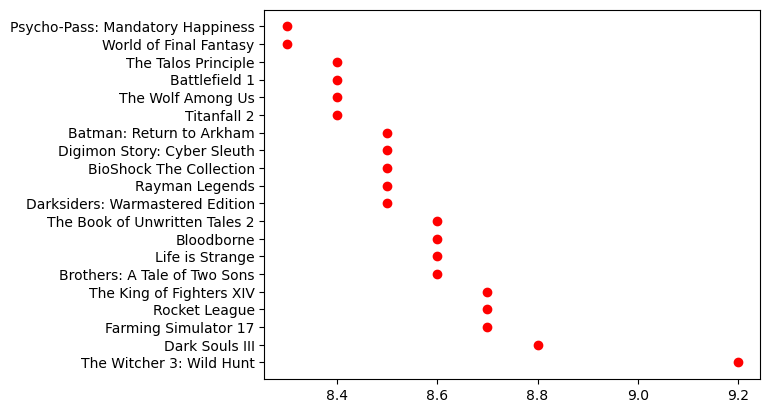

In [69]:
plt.scatter(PS4['user_score'].iloc[:20],PS4['name'].iloc[:20],color='r')


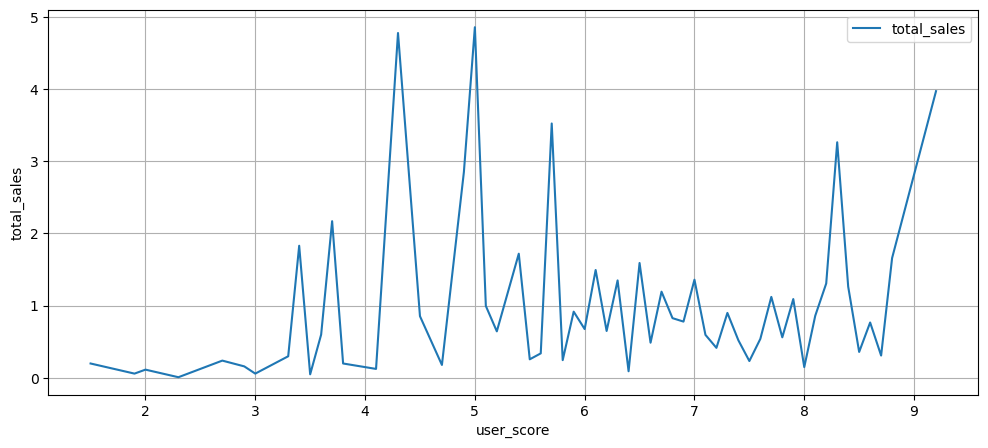

In [70]:
(PS4
      .pivot_table(index='user_score',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()


In [71]:
print(PS4['user_score'].corr(PS4['total_sales']))


-0.03195711020455644


for user score we can see there is no infulence on the total sales, we can see in 5 we have a high total sales point 

PS3 : Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [72]:
PS3=games_new[games_new['platform'] == 'PS3']
PS3=PS3[['name','year_of_release','critic_score','user_score','total_sales']].sort_values('critic_score',ascending=False)

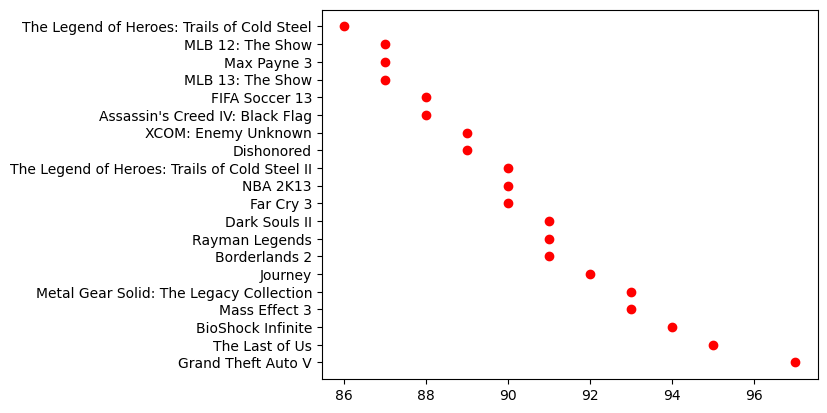

In [73]:
plt.scatter(PS3['critic_score'].iloc[:20],PS3['name'].iloc[:20],color='r')


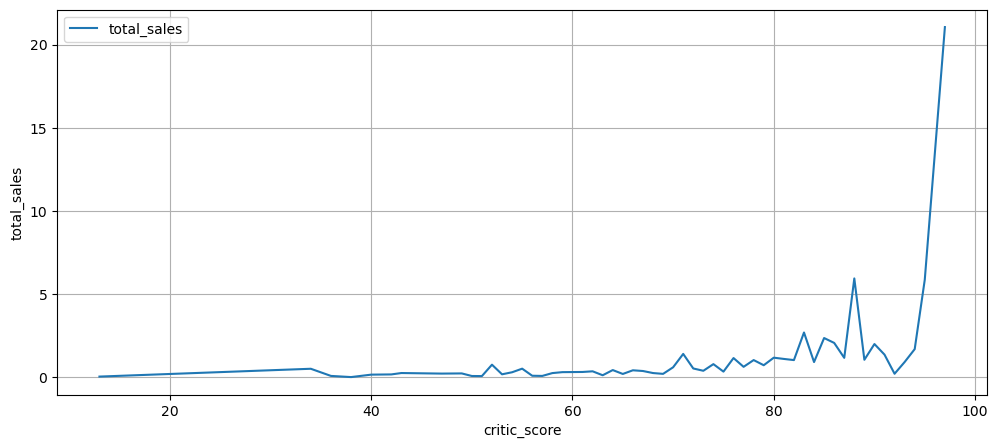

In [74]:
(PS3
      .pivot_table(index='critic_score',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.show()


In [75]:
print(PS3['critic_score'].corr(PS3['total_sales']))


0.33415175755098564


conclusion : we can see that there is a weak correlation between total sales and critic score games that has a high critic sales can help to get high revenue for the platforms 

In [76]:
PS3=games_new[games_new['platform'] == 'PS3']
PS3=PS3[['name','year_of_release','critic_score','user_score','total_sales']].sort_values('user_score',ascending=False)

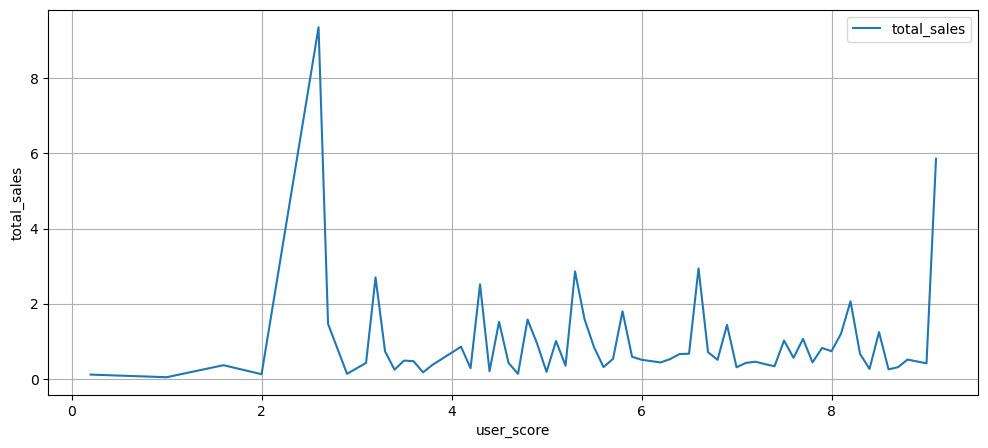

In [77]:
(PS3
      .pivot_table(index='user_score',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()


In [78]:
print(PS3['user_score'].corr(PS3['total_sales']))


-0.006205767686051512


for user score we can see there is no infulence on the total sales, we can see in 2 we have a high total sales point 

XOne : Take a look at how user and professional reviews affect sales for a particular popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [79]:
XOne=games_new[games_new['platform'] == 'XOne']
XOne=XOne[['name','year_of_release','critic_score','user_score','total_sales']].sort_values('critic_score',ascending=False)

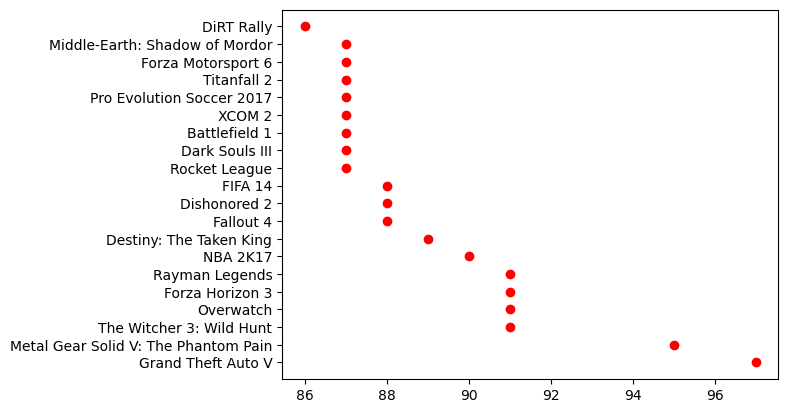

In [80]:
plt.scatter(XOne['critic_score'].iloc[:20],XOne['name'].iloc[:20],color='r')


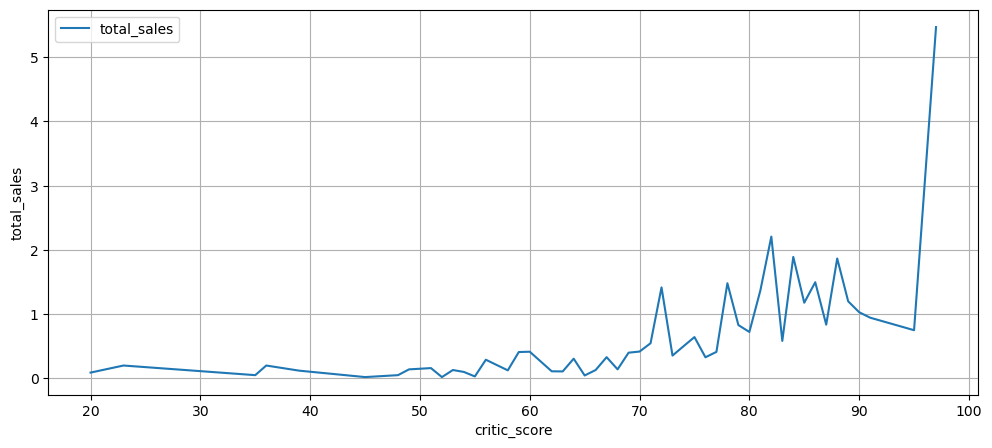

In [81]:
(XOne
      .pivot_table(index='critic_score',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.show()


In [82]:
print(XOne['critic_score'].corr(XOne['total_sales']))


0.41699832800840175


conclusion : we can see that there is a weak correlation between total sales and critic score games that has a high critic sales can help to get high revenue for the platforms 

In [83]:
XOne=games_new[games_new['platform'] == 'XOne']
XOne=XOne[['name','year_of_release','critic_score','user_score','total_sales']].sort_values('user_score',ascending=False)

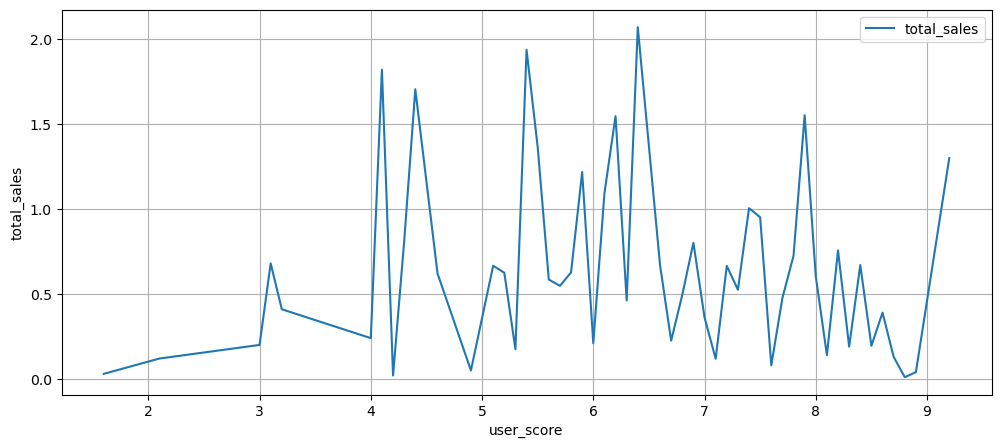

In [84]:
(XOne
      .pivot_table(index='user_score',values='total_sales')
      .plot(grid=True, figsize=(12,5))
)
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.show()


In [85]:
print(XOne['user_score'].corr(XOne['total_sales']))


-0.06892505328279423


also here, for user score we can see there is no infulence on the total sales, we can see too many peek in differernt low score that show us a high total sales point 

overall conclusion: from the research we can understand that user score and critic score has no influence in the total sales, in the 3 platforms we saw a high revenue peak for low score in user score.<br>
but in critic_score we had a weak correlation between total sales and the score, there is another variable that influence the total sales 

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?


In [86]:
by_genre = games_new.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
by_genre.head()

genre
Shooter         1.285865
Platform        0.717647
Sports          0.678127
Role-Playing    0.521081
Racing          0.468596
Name: total_sales, dtype: float64

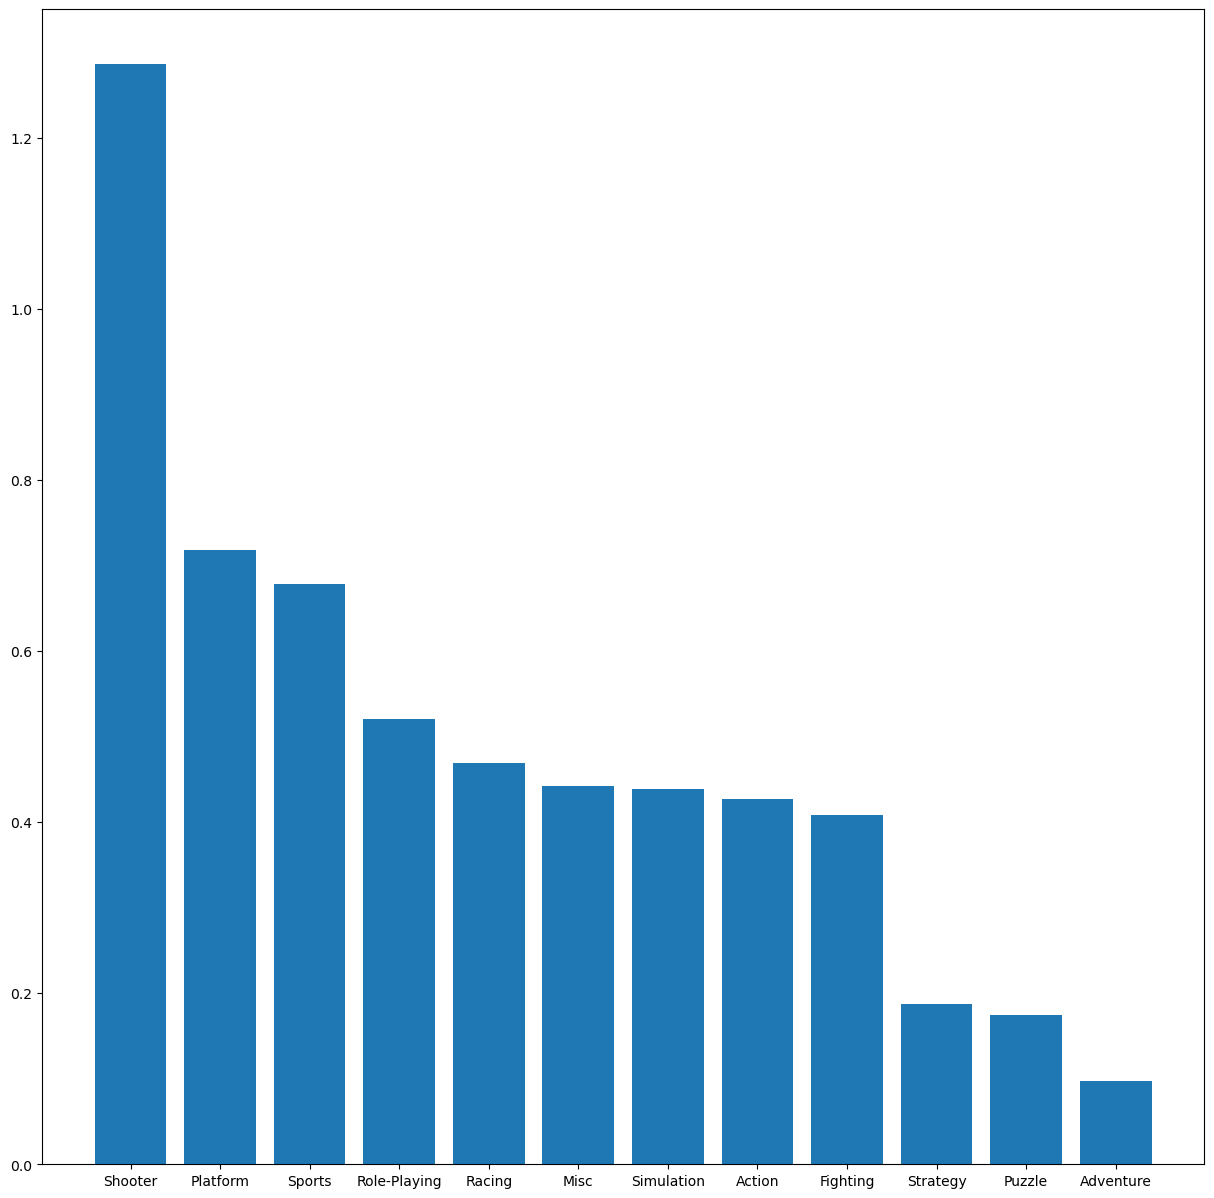

In [87]:
plt.figure(figsize=(15,15))
plt.bar(by_genre.index,by_genre)
plt.show()

Action is the most profitable genre 

In [88]:
genre=pd.pivot_table(games_new,index='year_of_release',columns='genre',values='total_sales',aggfunc='median',fill_value=0)
genre.tail()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,0.17,0.040,0.190,0.19,0.150,0.020,0.26,0.180,0.410,0.195,0.28,0.090
2013,0.20,0.025,0.155,0.18,0.385,0.100,0.34,0.180,0.340,0.105,0.37,0.190
2014,0.21,0.040,0.130,0.16,0.830,0.050,0.17,0.110,0.660,0.120,0.46,0.060
2015,0.07,0.030,0.100,0.19,0.100,0.045,0.15,0.105,0.925,0.200,0.12,0.045
2016,0.05,0.020,0.085,0.04,0.100,0.010,0.05,0.120,0.240,0.025,0.12,0.060


In [89]:
genre.shift(+1)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.17,0.040,0.190,0.19,0.150,0.020,0.26,0.180,0.410,0.195,0.28,0.090
2014,0.20,0.025,0.155,0.18,0.385,0.100,0.34,0.180,0.340,0.105,0.37,0.190
2015,0.21,0.040,0.130,0.16,0.830,0.050,0.17,0.110,0.660,0.120,0.46,0.060
2016,0.07,0.030,0.100,0.19,0.100,0.045,0.15,0.105,0.925,0.200,0.12,0.045


In [90]:
dynamics_genre=(genre - genre.shift(+1)).T
dynamics_genre

year_of_release,2012,2013,2014,2015,2016
genre,,,,,
Action,NaN,0.030,0.010,-0.140,-0.020
Adventure,NaN,-0.015,0.015,-0.010,-0.010
Fighting,NaN,-0.035,-0.025,-0.030,-0.015
Misc,NaN,-0.010,-0.020,0.030,-0.150
Platform,NaN,0.235,0.445,-0.730,0.000
Puzzle,NaN,0.080,-0.050,-0.005,-0.035
Racing,NaN,0.080,-0.170,-0.020,-0.100
Role-Playing,NaN,0.000,-0.070,-0.005,0.015
Shooter,NaN,-0.070,0.320,0.265,-0.685


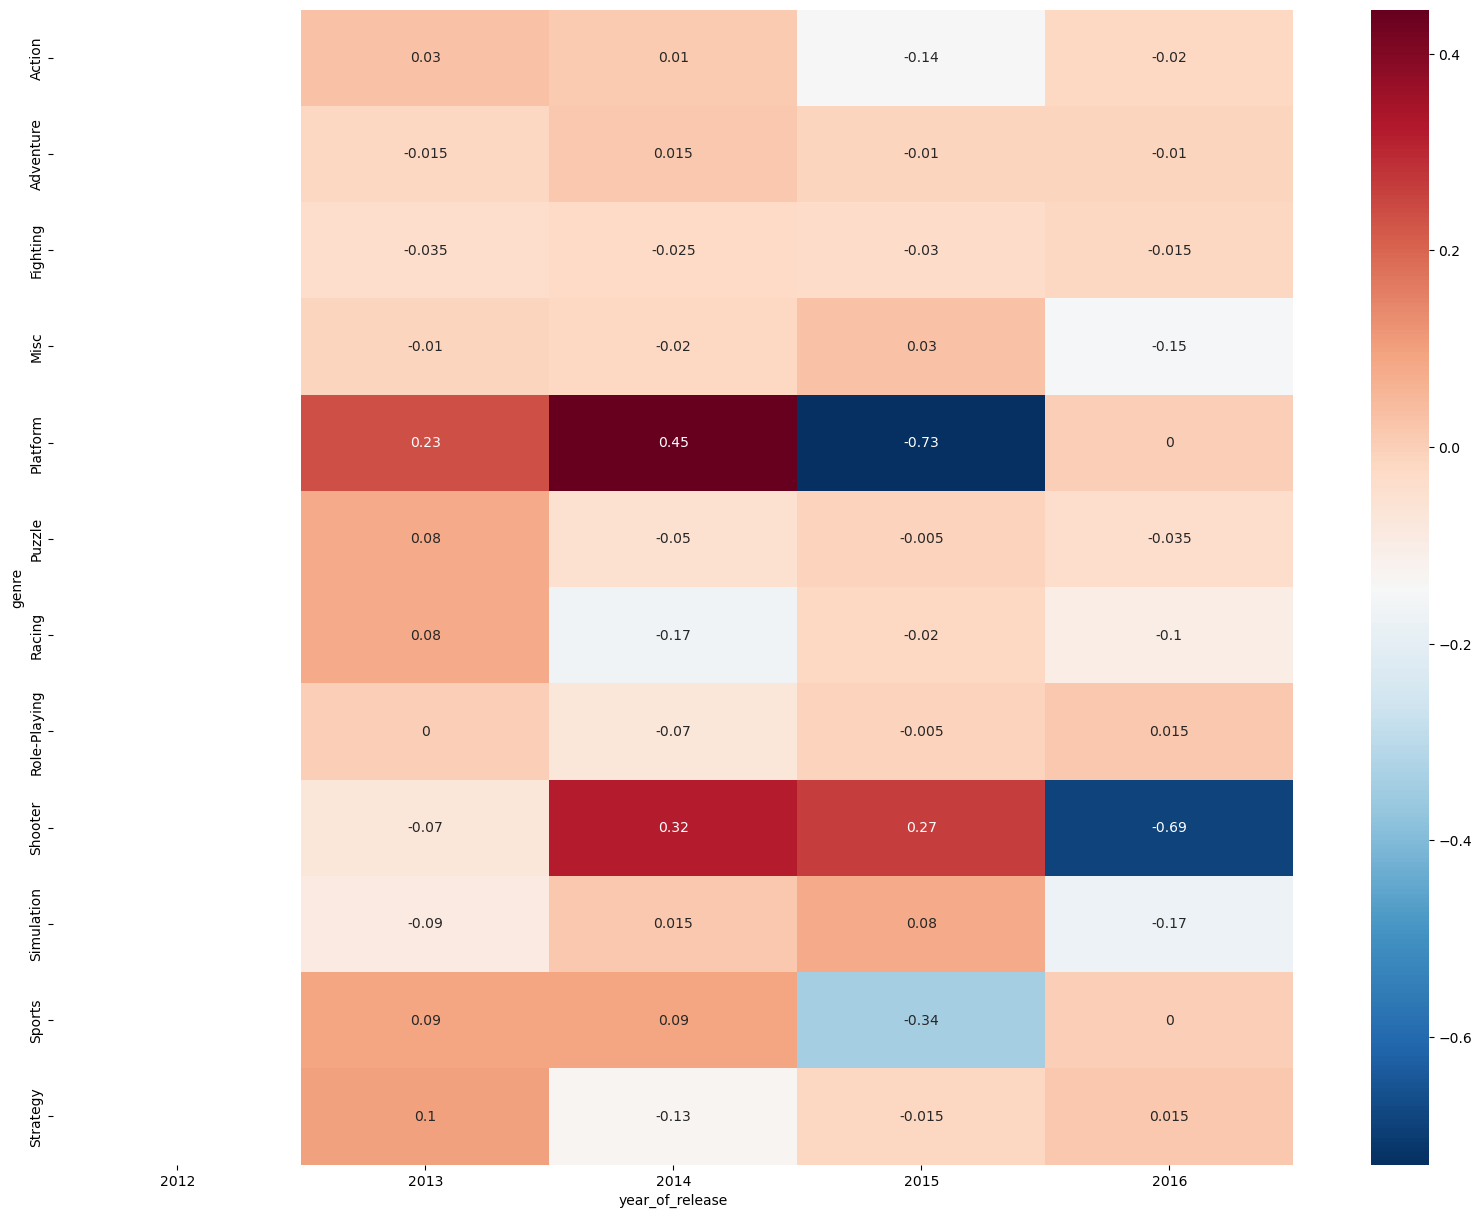

In [91]:
plt.figure(figsize=(20,15))
sns.heatmap(dynamics_genre, cmap='RdBu_r', annot=True)
plt.show()

according to the heatmap for genre sales in the last 4 years, we can see for every genre in the colorful cells there was a change in there reveneue, the values doesn't have to be positive in the last year because we dont have the complete data for 2016 so negative values in 2016 doesnt mean the genre is not profitable . we can see different profitable genres like shooter, role playing simulation and sports.

In [92]:
# Reviewer's code

display(games_new.groupby('genre')['total_sales'].sum().sort_values()[::-1])

games_new.groupby('genre')['total_sales'].count().sort_values()[::-1]

genre
Action          441.75
Shooter         304.75
Role-Playing    192.80
Sports          181.06
Misc             85.28
Platform         61.00
Racing           53.42
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

genre
Action          1034
Role-Playing     370
Adventure        302
Sports           267
Shooter          237
Misc             193
Racing           114
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: total_sales, dtype: int64

Action has 441 sum value and shooter has 304. However, Action has 1034 games, while shooter has only 267. That means, Action has such a large sum volume only due to the large number of games. Shooter games has a comparable sum volume with a small number of games.<br>
we have to take into account the number of games. <br>
now we see another distribution and Shooter performs better, it's a more successful genre on average. If we choose shooter over action, we will have a higher probability to sell a lot of. 

### Step 4. Create a user profile for each region
For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.

The top five genres. 

Explain the difference.

Do ESRB ratings affect sales in individual regions?

In [93]:
games_new['rating'] = games_new['rating'].fillna('xxxx')

In [94]:
games_new['rating'].unique()

array(['M', 'xxxx', 'E', 'E10+', 'T'], dtype=object)

**NA region :**

In [95]:
na=games_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,platform,na_sales
9,X360,140.06
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [96]:
na_genre=games_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_genre

,genre,na_sales
0,Action,177.92
8,Shooter,144.79
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [97]:
na_rating=games_new.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False).head()
na_rating

,rating,na_sales
2,M,0.460577
0,E,0.290279
1,E10+,0.247386
3,T,0.160633
4,xxxx,0.080964


that missing values could occur because of some region issues. Maybe different regions have different regulations

na user profile :<br>
top five platforms : 1.X360   2.PS4  3.PS3  4.XOne	5.3DS <br>
top five genre: 1.action  2.shooter  3.sports  4.role-playing   5.misc <br>
we can see that Na users tend to buy more games that titles rated M also we can see that 0.08m of the sales was for games that dont has values in the rate <br>

**EU region :**

In [99]:
eu=games_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,platform,eu_sales
4,PS4,141.09
3,PS3,106.85
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [100]:
eu_genre=games_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_genre

,genre,eu_sales
0,Action,159.82
8,Shooter,113.47
10,Sports,69.08
7,Role-Playing,48.53
6,Racing,27.23


In [101]:
eu_rating=games_new.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_rating

,rating,eu_sales
2,M,0.386561
0,E,0.286853
1,E10+,0.180948
3,T,0.128710
4,xxxx,0.071708


eu user profile :<br>
top five platforms : 1.PS4   2.PS3  3.X360  4.XOne	5.3DS <br>
top five genre: 1.action  2.shooter  3.sports  4.role-playing   5.Racing <br>
we can see that EU users tend to buy more games that titles rated M also we can see that 0.07m of the sales was for games that dont has values in the rate <br>
There're some similiarities with the Northern America. 

**JP region:**

In [102]:
jp=games_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [103]:
jp_genre=games_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_genre

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,13.10
9,Simulation,10.41
2,Fighting,9.44


In [104]:
jp_rating=games_new.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_rating

,rating,jp_sales
4,xxxx,0.085486
0,E,0.071904
3,T,0.063309
2,M,0.042147
1,E10+,0.026765


jp user profile :<br>
top five platforms : 1.3DS   2.PS3  3.PSV  4.PS4	5.WiiU <br>
top five genre: 1.Role-Playing  2.Action  3.Misc  4.Simulation   5.Fighting <br>
we can see that jp users  most of the sales come from games that don't have rating, and that could be because they have different regulations.<br>
Seem like in Japan people more likely prefer portable platforms and japanese market. We definitely should not recommend them XBox </div>  

## Step 5. Test the following hypotheses:
###### —Average user ratings of the Xbox One and PC platforms are the same.
###### —Average user ratings for the Action and Sports genres are different.

In [122]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,xxxx,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,xxxx,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [106]:
xbox=games_new[(games_new.platform=='XOne')&(games_new.user_score.notna())&(games_new.user_score!='tbd')]['user_score'].astype(float)
xbox

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [107]:
pc=games_new[(games_new.platform=='PC')&(games_new.user_score.notna())&(games_new.user_score!='tbd')]['user_score'].astype(float)
pc

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16463    6.8
16509    7.9
16518    1.4
16584    7.9
16692    7.6
Name: user_score, Length: 209, dtype: float64

In [108]:
action=games_new[(games_new.genre=='Action')&(games_new.user_score.notna())&(games_new.user_score!='tbd')]['user_score'].astype(float)
action


16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 526, dtype: float64

In [109]:
sports=games_new[(games_new.genre=='Sports')&(games_new.user_score.notna())&(games_new.user_score!='tbd')]['user_score'].astype(float)
sports

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 194, dtype: float64

**the variance for user_score in action data  is 1.241461 shows us how the values far from the mean, in addition the standard deviation is 1.114208 that indicates data are more spread out, also for Sports in user_score we have variance 1.394485 and standard deviation 1.180883**

### Test statistical hypotheses

**Our test :<br>
the average user ratings of the xbox one and pc platforms are equal <br>
the t_test assume that the average for 2 sample is equal, so we will take H0:average user ratings for the two platforms are equal** <br>
alternative hypothesis :
average user ratings for the two platforms are not equal**

In [110]:
sample1=xbox
sample2=pc

In [111]:
sample1

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [112]:
sample2

192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16463    6.8
16509    7.9
16518    1.4
16584    7.9
16692    7.6
Name: user_score, Length: 209, dtype: float64

In [113]:
stats.ttest_ind(sample1,sample2)


Ttest_indResult(statistic=0.6152448368896328, pvalue=0.5387527938220016)

In [114]:
stats.ttest_ind(sample1, sample2).pvalue

0.5387527938220016

In [115]:
alpha=0.05
if stats.ttest_ind(sample1, sample2).pvalue<alpha:
    print('We reject H0')
else:
    print('fail to reject H0: we dont have enough evidence to say that averages of sample 1 and sample 2 are not the same')

fail to reject H0: we dont have enough evidence to say that averages of sample 1 and sample 2 are not the same


**Our second test :<br>
the average user ratings of the action and sportd platforms are equal <br>
the t_test assume that the average for 2 sample is equal, so we will take H0:average user ratings for the two geners are equal**
alternative hypothesis :
average user ratings for the two geners are not equal**

In [116]:
sample3=action
sample4=sports

In [117]:
sample3

16       8.2
23       8.1
42       8.3
81       6.6
127      6.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 526, dtype: float64

In [118]:
sample4

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 194, dtype: float64

In [119]:
stats.ttest_ind(sample3,sample4)


Ttest_indResult(statistic=11.001512093693139, pvalue=4.0050286507528733e-26)

In [120]:
stats.ttest_ind(sample3, sample4).pvalue

4.0050286507528733e-26

In [121]:
alpha=0.05
if stats.ttest_ind(sample3, sample4).pvalue<alpha:
    print('We reject H0 ')
else:
    print('fail to reject H0: we dont have enough evidence to say that averages of sample 3 and sample 4 are not the same')

We reject H0 


## General conclusion


**Findings<br>
We have tested the following two hypotheses :<br>
first hypotheses:<br>
the average user ratings of the xbox one and pc platforms are equal<br>
fail to reject H0: we dont have enough evidence to say that averages of sample 1 and sample 2 are not the same
.<br>**

**we can see that the customer tend to use the pc platforms more than xone ,and according to our resaerch the pc platforms more profitable than xone, that could be because people are more likely to have a computer than to have an xbox <br>**

**second hypotheses:<br>
the average user ratings of the action and sport genre are equal <br>
We reject H0: average user ratings for the two genrs are not equal**

**based on the analysis it can be concluded that the most profitable platforms in the last years for each region:<br>
Na region :<br>
the most profitable platforms : 1.X360   2.PS4  3.PS3 <br> 
the most wanted genre: 1.action  2.shooter  3.sports  <br>**
<br>

**EU region:<br>
the most profitable platforms : 1.PS4   2.PS3  3.X360 <br>
the most wanted genre: 1.action  2.shooter  3.sports <br>**

**JP region:<br>
the most profitable platforms: 1.3DS   2.PS3  3.PSV  <br>
the most wanted genre: 1.Role-Playing  2.Action  3.Misc <br>**


